<a href="https://colab.research.google.com/github/yashasangani/DeepLearning-6th-July/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Load MNIST dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

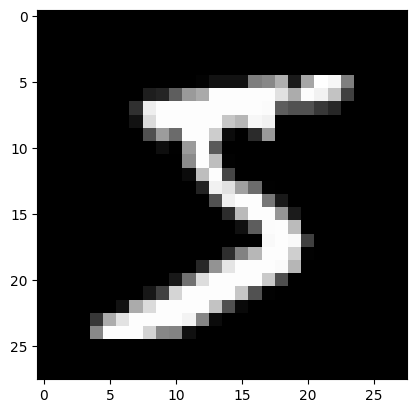

In [6]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap ='gray')

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

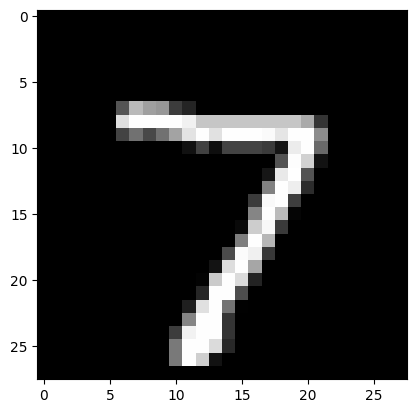

In [11]:
plt.imshow(xtest[0],cmap='gray')

## Displaying first 9 images from train data

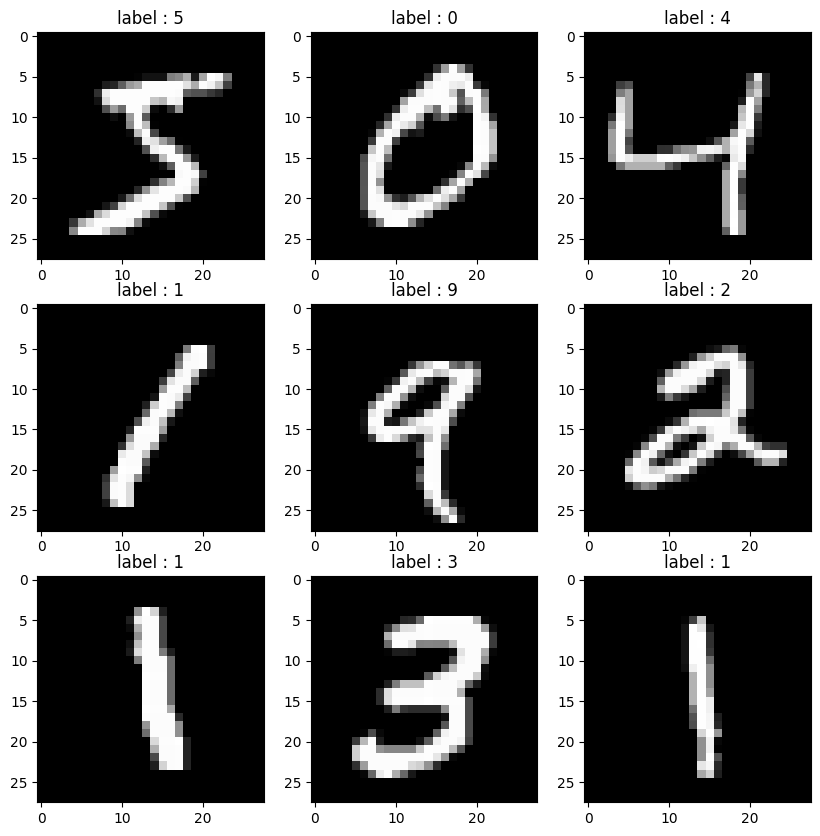

In [15]:
plt.figure(figsize =(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f"label : {ytrain[i]}")

In [16]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
len(np.unique(ytrain))

10

### This is a multiclass classification problem

### Preprocess image data
Pixel value 0-255

In [18]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [19]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### one hot encode the y features

In [20]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [21]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
xtrain.shape

(60000, 28, 28)

### Build the neural network
Simple Covnet architecture

In [26]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D,Flatten,Dense, Dropout

In [29]:
model = Sequential()

#added input layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu'))

#Add Max Pooling1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add concolution layer
model.add(Conv2D(filters=64, kernel_size = (3,3),activation= 'relu'))

# MAx pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Add Dropout layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(ytrain_cat.shape[1],activation = 'softmax'))



In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [33]:
hist = model.fit(xtrain_scl,ytrain_cat,epochs = 15,validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 4ms/step - loss: 0.2236 - accuracy: 0.9314 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0826 - accuracy: 0.9753 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0371 - val_accuracy: 0.9895
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0304 - val_accuracy: 0.9915
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0296 - val_accuracy

### Plot the learning curve

<function matplotlib.pyplot.show(close=None, block=None)>

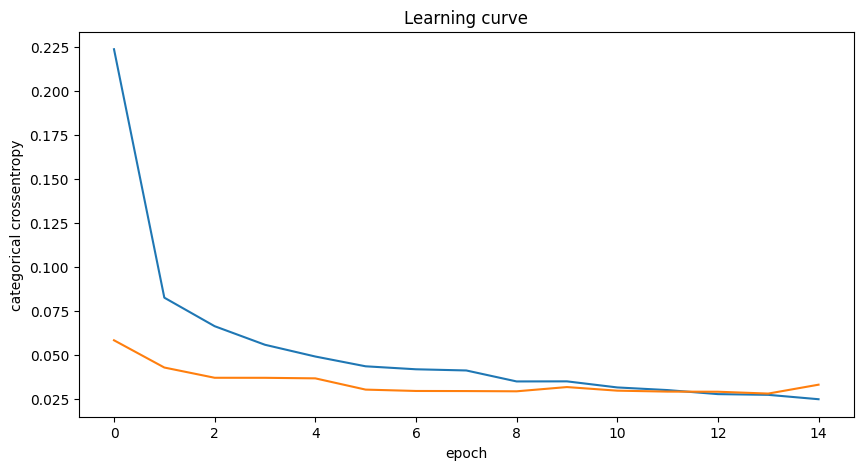

In [36]:
plt.figure(figsize = (10,5))
plt.plot(hist.history['loss'],label = 'Train loss')
plt.plot(hist.history['val_loss'],label = 'Validation loss')
plt.title('Learning curve')
plt.ylabel('categorical crossentropy')
plt.xlabel('epoch')
plt.show

## Evaluate the midel in train and test

In [37]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9966


[0.011101997457444668, 0.996566653251648]

In [40]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9925


[0.023872489109635353, 0.9925000071525574]

### Predict results for train and test

In [41]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [42]:
yprob_train[0:5]

array([[2.01011964e-14, 2.24270391e-13, 3.32389129e-12, 6.95504900e-03,
        3.33041052e-15, 9.93044436e-01, 4.22648841e-14, 3.22575522e-10,
        1.45238070e-08, 4.33200910e-07],
       [9.99998450e-01, 2.38248903e-18, 1.26480006e-06, 2.47197597e-12,
        1.75608497e-13, 1.66045476e-12, 8.93397498e-08, 1.40263628e-13,
        4.10817620e-08, 5.35875699e-08],
       [1.27795527e-16, 1.51332014e-08, 1.19123034e-09, 7.62700395e-13,
        9.99999642e-01, 1.24028045e-11, 1.88671791e-13, 2.04451823e-07,
        1.23789945e-09, 6.81589611e-08],
       [3.73964504e-09, 9.99975920e-01, 3.38838277e-06, 3.78822335e-10,
        3.94045219e-06, 2.57443122e-10, 3.67123469e-08, 1.25163679e-05,
        4.20324295e-06, 3.77133560e-08],
       [5.22983993e-14, 7.47618764e-13, 6.31760366e-10, 1.17923360e-08,
        6.14091391e-07, 7.09755388e-12, 1.37391192e-16, 1.04396072e-07,
        1.77574134e-06, 9.99997497e-01]], dtype=float32)

In [43]:
import numpy as np
ypred_train = np.argmax(yprob_train,axis =1)
ypred_test = np.argmax(yprob_test,axis = 1)

In [44]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [45]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [46]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [47]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

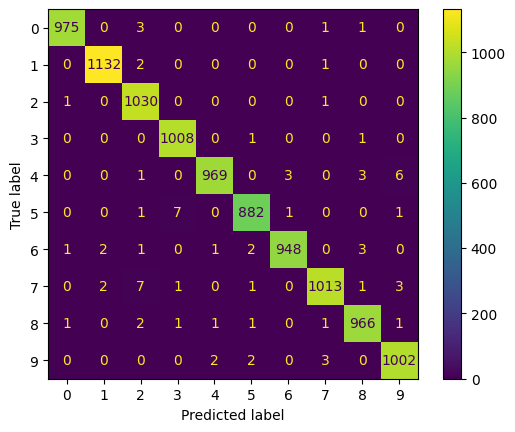

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#### Save above model for future use

In [53]:
model.save('Digit_Model.keras')

### Load above model

In [55]:
from keras.models import load_model
nn = load_model('/content/Digit_Model.keras')
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             